In [16]:
%matplotlib inline
from matplotlib import pyplot as plt 

import numpy as np
import pandas as pd

from pandas.plotting import scatter_matrix

from sklearn import model_selection

# Load Data 

In [32]:
df_housing = pd.read_csv('../datasets/housing/housing.csv', encoding='utf8', sep=',')
print(df_housing.shape)
df_housing[:3]

(20640, 10)


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY


In [33]:
### try some attribute combinations
df_housing['rooms_per_household'] = df_housing['total_rooms'] / df_housing['households']
df_housing['bedrooms_per_room'] = df_housing['total_bedrooms'] / df_housing['total_rooms']
df_housing['population_per_household'] = df_housing['population'] / df_housing['households']

df_housing['income_cat'] = pd.cut(df_housing['median_income'], bins=[0.0, 1.5, 3.0, 4.5, 6, np.inf], labels=[1, 2, 3, 4, 5])

In [34]:
# total_bedrooms has some na values

print(df_housing.info())
print("#" * 30)
print(df_housing.describe())
print("#" * 30)
print(df_housing['ocean_proximity'].value_counts())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 14 columns):
longitude                   20640 non-null float64
latitude                    20640 non-null float64
housing_median_age          20640 non-null float64
total_rooms                 20640 non-null float64
total_bedrooms              20433 non-null float64
population                  20640 non-null float64
households                  20640 non-null float64
median_income               20640 non-null float64
median_house_value          20640 non-null float64
ocean_proximity             20640 non-null object
rooms_per_household         20640 non-null float64
bedrooms_per_room           20433 non-null float64
population_per_household    20640 non-null float64
income_cat                  20640 non-null category
dtypes: category(1), float64(12), object(1)
memory usage: 2.1+ MB
None
##############################
          longitude      latitude  housing_median_age   total_rooms  \
coun

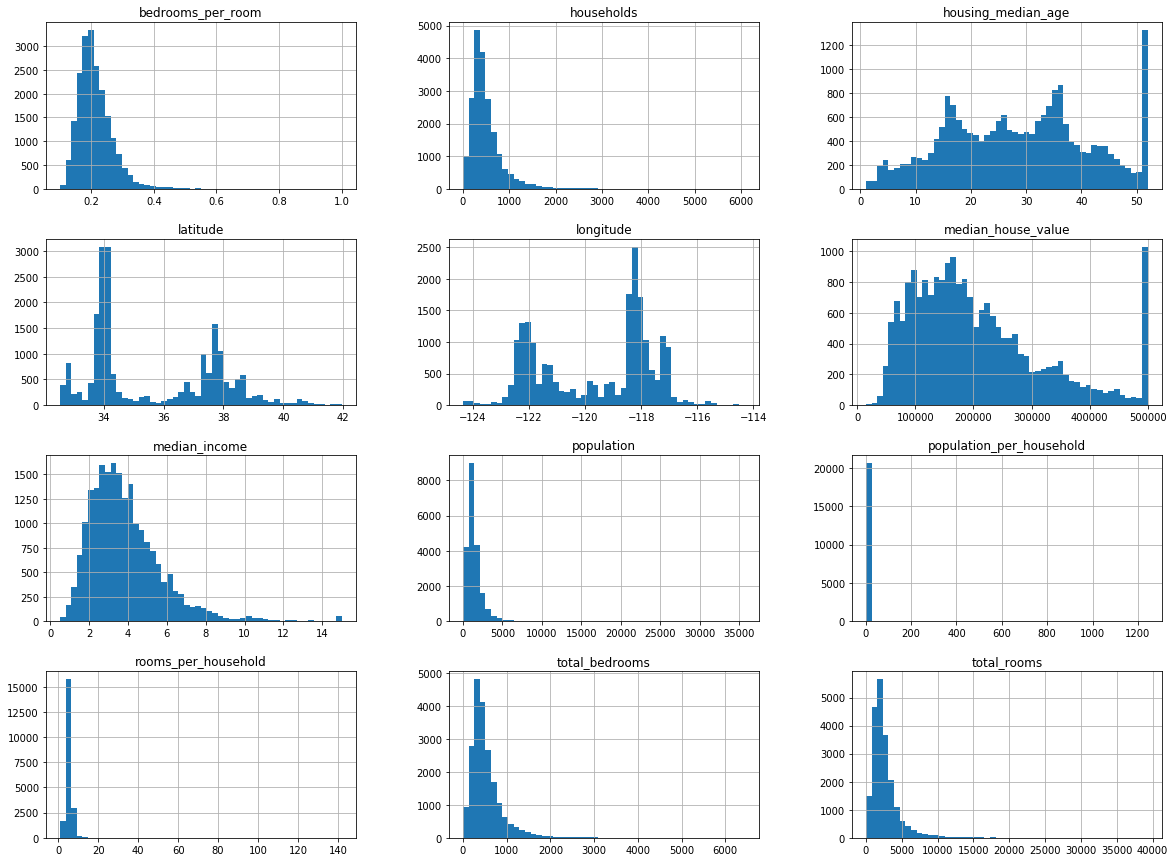

In [35]:
df_housing.hist(bins=50, figsize=(20, 15))
plt.show()

In [36]:
### try some attribute combinations
df_housing['rooms_per_household'] = df_housing['total_rooms'] / df_housing['households']
df_housing['bedrooms_per_room'] = df_housing['total_bedrooms'] / df_housing['total_rooms']
df_housing['population_per_household'] = df_housing['population'] / df_housing['households']

df_housing['income_cat'] = pd.cut(df_housing['median_income'], bins=[0.0, 1.5, 3.0, 4.5, 6, np.inf], labels=[1, 2, 3, 4, 5])

# Split Data

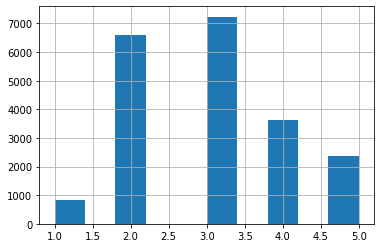

In [37]:
df_housing['income_cat'].hist()
plt.show()

In [38]:
split = model_selection.StratifiedShuffleSplit(
    n_splits=1, 
    test_size=0.2, 
    random_state=42
)
for train_idx, test_idx in split.split(df_housing, df_housing['income_cat']):
    df_train = df_housing.loc[train_idx]
    df_test = df_housing.loc[test_idx]
print(df_train.shape, df_test.shape)
print(df_test['income_cat'].value_counts() / len (df_test))
print(df_housing['income_cat'].value_counts() / len (df_housing))

(16512, 14) (4128, 14)
3    0.350533
2    0.318798
4    0.176357
5    0.114583
1    0.039729
Name: income_cat, dtype: float64
3    0.350581
2    0.318847
4    0.176308
5    0.114438
1    0.039826
Name: income_cat, dtype: float64


# EDA

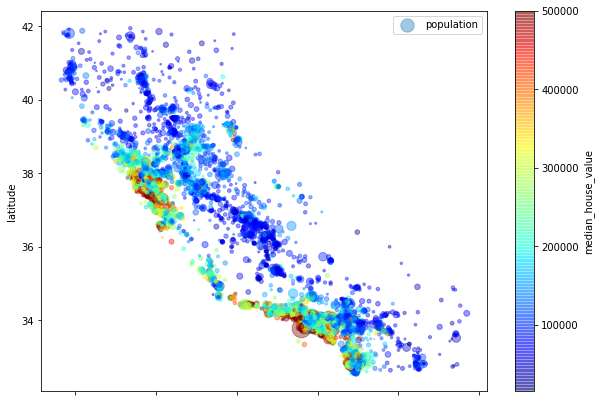

In [39]:
df_train.plot(
    kind="scatter", 
    x = "longitude", 
    y = "latitude", 
    alpha = 0.4,  # ???
    s = df_housing['population'] / 100,  # radius of circle
    label = "population",  
    figsize = (10, 7), 
    c = "median_house_value",  # color
    cmap = plt.get_cmap("jet"), 
    colorbar = True
)
plt.legend()
plt.show()

In [40]:
corr_matrix = df_train.corr()
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value          1.000000
median_income               0.687160
rooms_per_household         0.146285
total_rooms                 0.135097
housing_median_age          0.114110
households                  0.064506
total_bedrooms              0.047689
population_per_household   -0.021985
population                 -0.026920
longitude                  -0.047432
latitude                   -0.142724
bedrooms_per_room          -0.259984
Name: median_house_value, dtype: float64

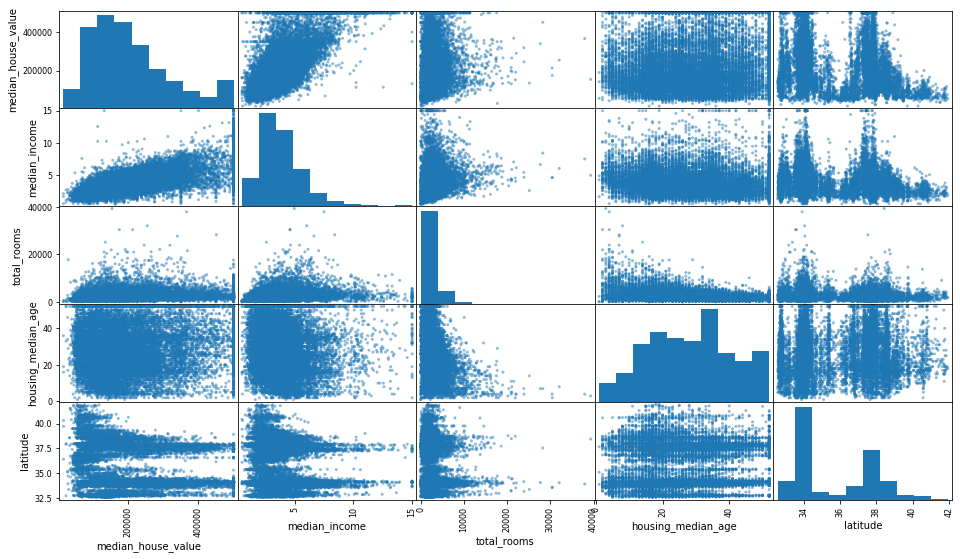

In [29]:
attributes = ["median_house_value", "median_income", "total_rooms", "housing_median_age", "latitude"]
scatter_matrix(df_train[attributes], figsize=(16, 9))
plt.show()

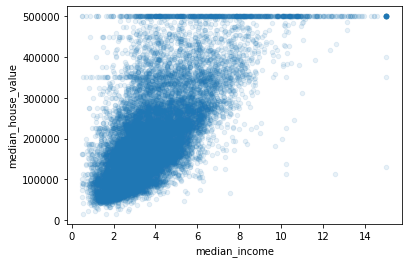

In [30]:
df_train.plot(
    kind="scatter", 
    x = "median_income", 
    y = "median_house_value", 
    alpha = 0.1
)
plt.show()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16512 entries, 17606 to 15775
Data columns (total 11 columns):
longitude             16512 non-null float64
latitude              16512 non-null float64
housing_median_age    16512 non-null float64
total_rooms           16512 non-null float64
total_bedrooms        16354 non-null float64
population            16512 non-null float64
households            16512 non-null float64
median_income         16512 non-null float64
median_house_value    16512 non-null float64
ocean_proximity       16512 non-null object
income_cat            16512 non-null category
dtypes: category(1), float64(9), object(1)
memory usage: 1.4+ MB
